<a href="https://colab.research.google.com/github/m-kelly444/cs5356-hw3/blob/main/2-svd_rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low-Rank Approximation

In this section, you will be asked to investigated how the trade-off between
the selected ranks of SVD and its performance in terms of reconstruction
accuracy and speed-up (in clock-time and in FLOPS).

## 1. Set-up

In [17]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
# Make sure your token is stored in a txt file at the location below.
# This way there is no risk that you will push it to your repo
# Never share your token with anyone, it is basically your github password!
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
    handle = f.readline().strip()

In [19]:
# Clone your github repo
YOUR_TOKEN = token
YOUR_HANDLE = handle
BRANCH = "main"

%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull

PROJECT_ROOT = f"/content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ece5545’: File exists
/content/gdrive/MyDrive/ece5545
fatal: destination path 'a4-m-kelly444' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece5545/a4-m-kelly444
Already on 'main'
Your branch is up to date with 'origin/main'.
Already up to date.


In [20]:
# This extension reloads all imports before running each cell
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Verify the following cell prints your github repository.

In [21]:
!ls {PROJECT_ROOT}

 1-numerical_precision.ipynb
 2-svd_rank.ipynb
 data
 fully_random_matrix_svd_analysis.png
 mnist_fc_weights_svd_analysis.png
 mnist_first_layer_activations_svd_analysis.png
 mnist.py
 mnist_second_layer_activations_svd_analysis.png
 README.md
 src
'structured_random_matrix_(rank≈50)_svd_analysis.png'
 tests


In [22]:
# Install required packgaes
!pip install torch numpy matplotlib

# 2. Rank v.s. Reconstruction Error

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the reconstruction error of the matrix (in the y-axis, measured by the Frobenius Norm).

NOTE: you can use `svd(A, torch.eye(A.shape(2), rank_A=<rank>, rank_B=None)` to do SVD, drop the rank
to `<rank>`, and return the reconstruction matrix of `A`.

We will provide a series of matrix for you to study. Please make one plot per matrix.
For each plot, comment on the trade-off between the number of ranks selected and the error by answering
the following questions:
1. Is the reconstruction error increasing or decreasing as we add more rank?
2. How fast is the reconstruction error change as we add more rank? Is it changing quickly or slowly? Why?
3. Is there a rank number below/above which the reconstruction error increase significantly?
4. What can you learn about this data?

In [23]:
from src.matmul import svd
import torch
import matplotlib.image
# Pixels of a cute cat
A = torch.from_numpy(matplotlib.image.imread("data/cat.png")).view(-1, 3)

In [24]:
# A batch of MNIST digit
import torch
A = torch.load("data/mnist_act.pt")['act.0']

In [25]:
import torch
# A random matrix
A = torch.randn(512, 512)

In [26]:
import torch
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

In [27]:
import torch
# Weight matrix of a fully connected neural network (trained on MNIST)
A = torch.load("data/mnist_fc.pt")['fc2.weight']

# 2. Rank v.s. Speed up

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the speed up of matrix-matrix multiply (in the y-axis, measured by both FLOPs and clock time)

You can assume both matrix A and B are using the same number of rank when approximating.

In [28]:
import torch
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

# Weight matrix of a fully connected neural network (trained on MNIST)
B = torch.load("data/mnist_fc.pt")['fc2.weight'].transpose(0, 1)


GPU available: True
GPU: Tesla T4
Using device: cuda

Analyzing: Cat Image RGB Values
Shape A: torch.Size([262144, 3])
Using device: cuda
Error with cat image: CUDA out of memory. Tried to allocate 256.00 GiB. GPU 0 has a total capacity of 14.74 GiB of which 14.59 GiB is free. Process 16131 has 152.00 MiB memory in use. Of the allocated memory 13.57 MiB is allocated by PyTorch, and 12.43 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Analyzing: MNIST First Layer Activations
Shape A: torch.Size([512, 784])
Using device: cuda


Testing ranks:   0%|          | 0/11 [00:00<?, ?it/s]

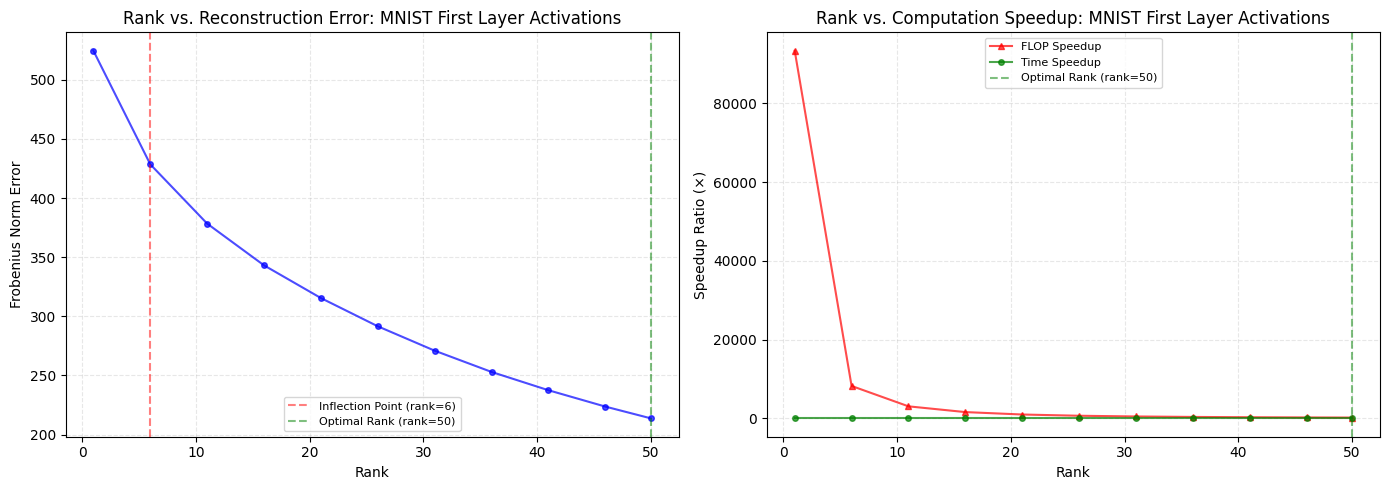


 Analysis Results:

 Reconstruction Error Analysis:
   ▪ Initial error (rank=1): 524.5771
   ▪ Final error (rank=50): 213.7255
   ▪ Error reduction: 59.26%
   ▪ Inflection point at rank 6 (error: 428.5180)

 Computational Performance:
   ▪ Maximum FLOP speedup: 93333.74× (at rank 1)
   ▪ Maximum time speedup: 0.00× (at rank 50)

 Insights for MNIST First Layer Activations:
   ▪ Reconstruction error decreases RAPIDLY with additional ranks
   ▪ Data is HIGHLY compressible/structured

Analyzing: MNIST Second Layer Activations
Shape A: torch.Size([512, 512])
Using device: cuda


Testing ranks:   0%|          | 0/11 [00:00<?, ?it/s]

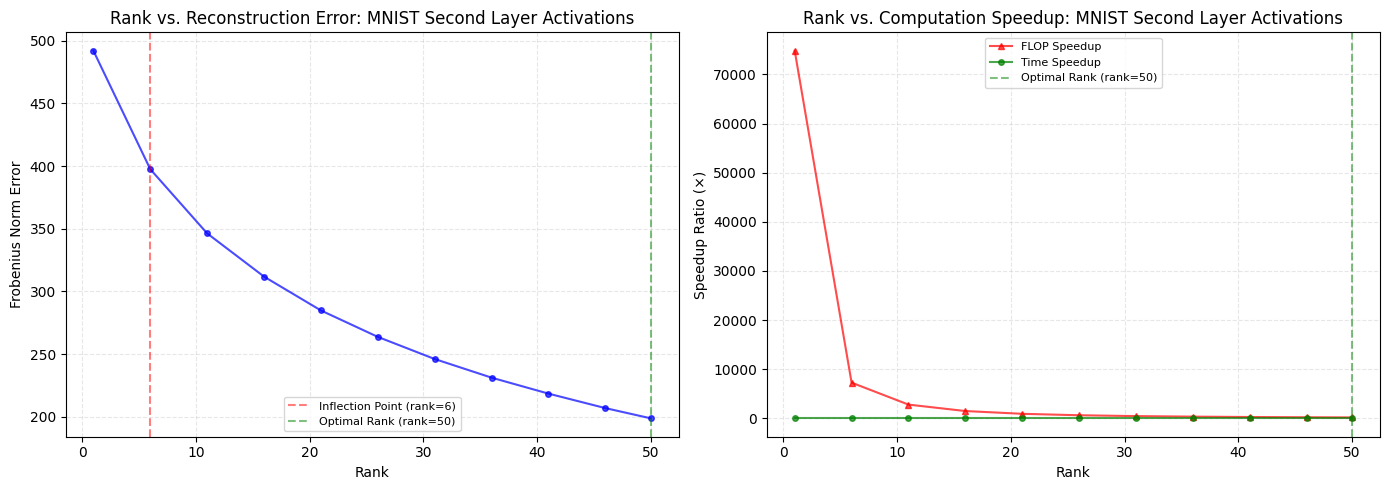


 Analysis Results:

 Reconstruction Error Analysis:
   ▪ Initial error (rank=1): 491.9820
   ▪ Final error (rank=50): 198.7459
   ▪ Error reduction: 59.60%
   ▪ Inflection point at rank 6 (error: 397.4781)

 Computational Performance:
   ▪ Maximum FLOP speedup: 74814.79× (at rank 1)
   ▪ Maximum time speedup: 0.00× (at rank 6)

 Insights for MNIST Second Layer Activations:
   ▪ Reconstruction error decreases RAPIDLY with additional ranks
   ▪ Data is HIGHLY compressible/structured

Analyzing: MNIST FC Weights
Shape A: torch.Size([128, 512])
Shape B: torch.Size([512, 128])
Using device: cuda


Testing ranks:   0%|          | 0/11 [00:00<?, ?it/s]

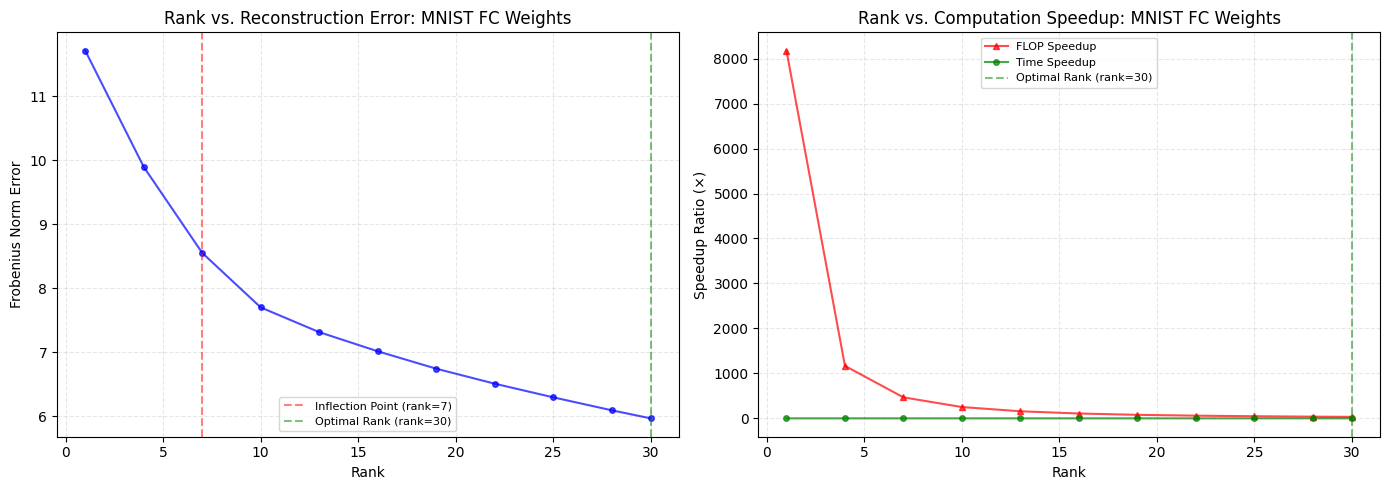


 Analysis Results:

 Reconstruction Error Analysis:
   ▪ Initial error (rank=1): 11.7076
   ▪ Final error (rank=30): 5.9708
   ▪ Error reduction: 49.00%
   ▪ Inflection point at rank 7 (error: 8.5520)

 Computational Performance:
   ▪ Maximum FLOP speedup: 8176.03× (at rank 1)
   ▪ Maximum time speedup: 0.01× (at rank 13)

 Insights for MNIST FC Weights:
   ▪ Reconstruction error decreases GRADUALLY with additional ranks
   ▪ Data has MODERATE structure/patterns

Analyzing: Structured Random Matrix (rank≈50)
Shape A: torch.Size([512, 512])
Using device: cuda


Testing ranks:   0%|          | 0/21 [00:00<?, ?it/s]

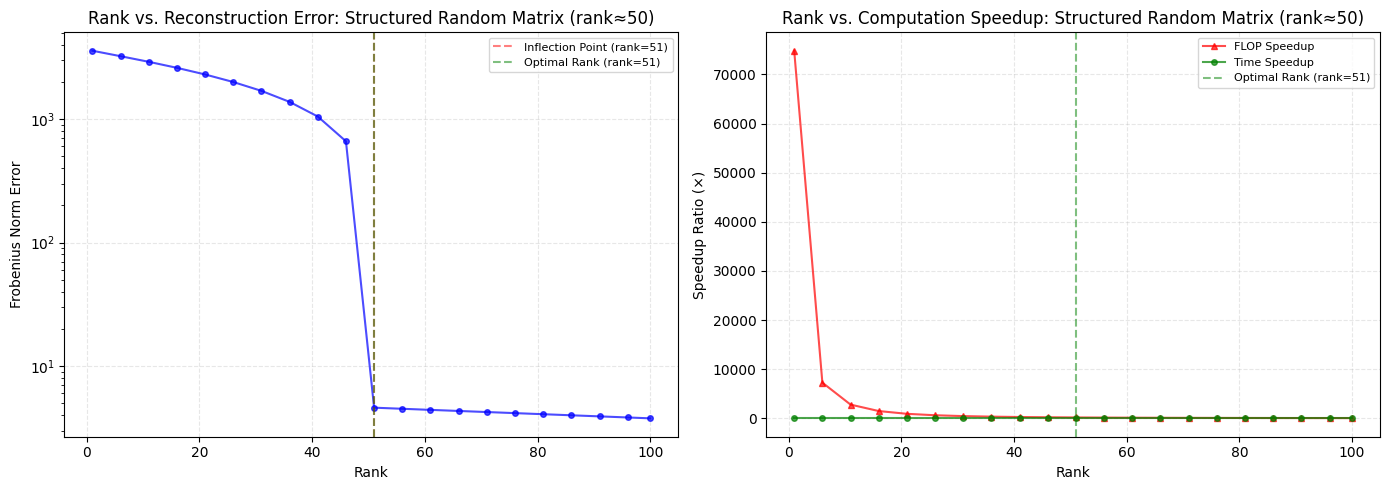


 Analysis Results:

 Reconstruction Error Analysis:
   ▪ Initial error (rank=1): 3573.0793
   ▪ Final error (rank=100): 3.7681
   ▪ Error reduction: 99.89%
   ▪ Inflection point at rank 51 (error: 4.5971)

 Computational Performance:
   ▪ Maximum FLOP speedup: 74814.79× (at rank 1)
   ▪ Maximum time speedup: 0.00× (at rank 36)

 Optimal Trade-off:
   ▪ Recommended rank: 51
   ▪ Error at this rank: 4.5971 (0.13% of max)
   ▪ FLOP speedup: 179.71×
   ▪ Time speedup: 0.00×

 Insights for Structured Random Matrix (rank≈50):
   ▪ Reconstruction error decreases GRADUALLY with additional ranks
   ▪ Data has MODERATE structure/patterns

Analyzing: Fully Random Matrix
Shape A: torch.Size([256, 256])
Using device: cuda


Testing ranks:   0%|          | 0/11 [00:00<?, ?it/s]

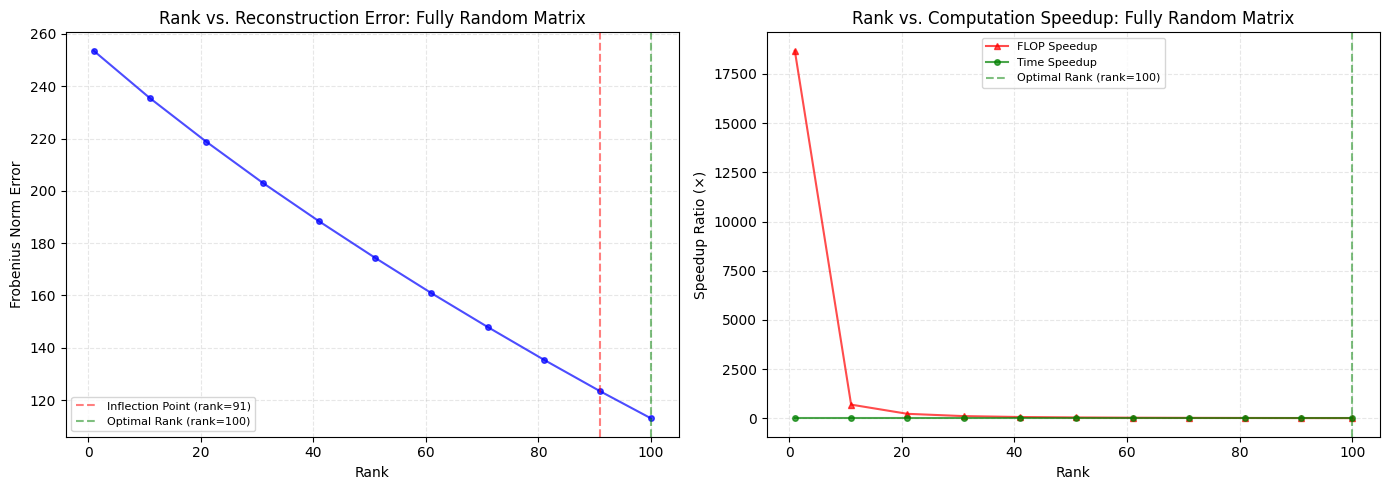


 Analysis Results:

 Reconstruction Error Analysis:
   ▪ Initial error (rank=1): 253.5894
   ▪ Final error (rank=100): 112.9992
   ▪ Error reduction: 55.44%
   ▪ Inflection point at rank 91 (error: 123.3311)

 Computational Performance:
   ▪ Maximum FLOP speedup: 18682.87× (at rank 1)
   ▪ Maximum time speedup: 0.00× (at rank 61)

 Insights for Fully Random Matrix:
   ▪ Reconstruction error decreases RAPIDLY with additional ranks
   ▪ Data appears RANDOM or has complex structure

 Analysis complete!


In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
import os

def frobenius_norm_error(A, A_reconstructed):
    """Compute reconstruction error using Frobenius norm."""
    return torch.norm(A - A_reconstructed, p='fro').item()

def compute_flops(m, n, p, rank=None):
    """
    Compute FLOPs for matrix multiplication with optional low-rank approximation.

    Args:
        m, n, p: Dimensions where A is (m,n) and B is (n,p)
        rank: If provided, computes FLOPs for low-rank approximation

    Returns:
        Number of FLOPs
    """
    if rank is None:
        # Standard matrix multiplication: 2*m*n*p
        return 2 * m * n * p
    else:
        # Low-rank SVD multiplication
        svd_flops = (m+n+1)*rank + (n+p+1)*rank  # SVD decomposition
        mult_flops = n*rank**2 + 2*rank**2 + (m+p)*rank  # Multiplication using low-rank
        return svd_flops + mult_flops

def analyze_svd_performance(A, B=None, max_rank=None, rank_step=1,
                           num_timing_runs=3, device='cpu'):
    """
    Comprehensive analysis of SVD performance vs rank.

    Args:
        A: Input matrix
        B: Second matrix (uses A.T if None)
        max_rank: Maximum rank to test (default: min dimension)
        rank_step: Step size for testing ranks
        num_timing_runs: Number of timing tests to average
        device: Device for computation ('cpu' or 'cuda')

    Returns:
        Dictionary with analysis results
    """
    from src.matmul import svd

    # Move tensors to specified device
    A = A.to(device)
    if B is None:
        B = A.transpose(0, 1).to(device)
    else:
        B = B.to(device)

    # Determine matrix dimensions
    m, n = A.shape
    n2, p = B.shape
    assert n == n2, "Matrix dimensions don't match for multiplication"

    # Set maximum rank if not provided
    if max_rank is None:
        max_rank = min(min(m, n), min(n, p))
    else:
        max_rank = min(max_rank, min(min(m, n), min(n, p)))

    # Define ranks to test
    ranks = list(range(1, max_rank + 1, rank_step))
    if ranks[-1] != max_rank:
        ranks.append(max_rank)

    # Initialize result containers
    errors = []
    flops_ratios = []
    time_ratios = []

    # Calculate baseline for standard matrix multiplication
    baseline_flops = compute_flops(m, n, p)

    # Measure baseline time
    torch.cuda.synchronize() if device == 'cuda' else None
    baseline_times = []
    for _ in range(num_timing_runs):
        start = time.time()
        _ = A @ B
        torch.cuda.synchronize() if device == 'cuda' else None
        baseline_times.append(time.time() - start)
    baseline_time = sum(baseline_times) / len(baseline_times)

    # Progress through ranks
    for rank in tqdm(ranks, desc="Testing ranks"):
        # 1. Measure reconstruction error
        A_reconstructed = svd(A, torch.eye(n, device=device), rank_A=rank, rank_B=None)
        error = frobenius_norm_error(A, A_reconstructed)
        errors.append(error)

        # 2. Calculate FLOP ratio
        svd_flops = compute_flops(m, n, p, rank)
        flops_ratio = baseline_flops / svd_flops
        flops_ratios.append(flops_ratio)

        # 3. Measure time ratio
        svd_times = []
        for _ in range(num_timing_runs):
            torch.cuda.synchronize() if device == 'cuda' else None
            start = time.time()
            _ = svd(A, B, rank_A=rank, rank_B=rank)
            torch.cuda.synchronize() if device == 'cuda' else None
            svd_times.append(time.time() - start)
        svd_time = sum(svd_times) / len(svd_times)
        time_ratio = baseline_time / svd_time
        time_ratios.append(time_ratio)

    # Normalize errors for analysis
    max_error = max(errors)
    errors_normalized = [e/max_error for e in errors]

    # Find optimal rank based on error threshold
    error_threshold = 0.05  # 5% of maximum error
    optimal_rank_idx = next((i for i, e in enumerate(errors_normalized)
                            if e < error_threshold), len(ranks)-1)

    # Find inflection point (maximum second derivative)
    inflection_idx = 0
    max_derivative_change = 0
    for i in range(1, len(errors_normalized)-1):
        derivative_change = abs((errors_normalized[i+1] - 2*errors_normalized[i] + errors_normalized[i-1]))
        if derivative_change > max_derivative_change:
            max_derivative_change = derivative_change
            inflection_idx = i

    # Return all results
    return {
        'ranks': ranks,
        'errors': errors,
        'flops_ratios': flops_ratios,
        'time_ratios': time_ratios,
        'optimal_rank_idx': optimal_rank_idx,
        'inflection_idx': inflection_idx
    }

def plot_svd_results(results, dataset_name):
    """
    Create visualization of SVD analysis results.

    Args:
        results: Dictionary from analyze_svd_performance
        dataset_name: Name of the dataset for plot titles
    """
    ranks = results['ranks']
    errors = results['errors']
    flops_ratios = results['flops_ratios']
    time_ratios = results['time_ratios']
    optimal_rank = ranks[results['optimal_rank_idx']]
    inflection_rank = ranks[results['inflection_idx']]

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100)

    # 1. Plot reconstruction error
    ax1.plot(ranks, errors, 'b-o', markersize=4, alpha=0.7)
    ax1.set_title(f"Rank vs. Reconstruction Error: {dataset_name}", fontsize=12)
    ax1.set_xlabel('Rank', fontsize=10)
    ax1.set_ylabel('Frobenius Norm Error', fontsize=10)

    # Add markers for special points
    ax1.axvline(x=inflection_rank, color='r', linestyle='--', alpha=0.5,
               label=f'Inflection Point (rank={inflection_rank})')
    ax1.axvline(x=optimal_rank, color='g', linestyle='--', alpha=0.5,
               label=f'Optimal Rank (rank={optimal_rank})')

    # Use log scale if range is large
    if max(errors) / min(errors) > 100:
        ax1.set_yscale('log')

    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.legend(fontsize=8)

    # 2. Plot speedup ratios
    ax2.plot(ranks, flops_ratios, 'r-^', markersize=4, alpha=0.7, label='FLOP Speedup')
    ax2.plot(ranks, time_ratios, 'g-o', markersize=4, alpha=0.7, label='Time Speedup')
    ax2.set_title(f"Rank vs. Computation Speedup: {dataset_name}", fontsize=12)
    ax2.set_xlabel('Rank', fontsize=10)
    ax2.set_ylabel('Speedup Ratio (×)', fontsize=10)

    # Add markers for special points
    ax2.axvline(x=optimal_rank, color='g', linestyle='--', alpha=0.5,
               label=f'Optimal Rank (rank={optimal_rank})')

    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.legend(fontsize=8)

    plt.tight_layout()
    plt.savefig(f"{dataset_name.replace(' ', '_').lower()}_svd_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()

def analyze_and_report(dataset_name, A, B=None, max_rank=None, rank_step=1):
    """
    Run complete analysis and generate report.

    Args:
        dataset_name: Name of the dataset
        A: Input matrix
        B: Second matrix (optional)
        max_rank: Maximum rank to test
        rank_step: Step size for testing ranks

    Returns:
        Analysis results
    """
    print(f"\n{'='*50}")
    print(f"Analyzing: {dataset_name}")
    print(f"Shape A: {A.shape}")
    if B is not None:
        print(f"Shape B: {B.shape}")
    print(f"{'='*50}")

    # Choose device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # Run analysis
    results = analyze_svd_performance(A, B, max_rank, rank_step, device=device)

    # Plot results
    plot_svd_results(results, dataset_name)

    # Generate report
    ranks = results['ranks']
    errors = results['errors']
    flops_ratios = results['flops_ratios']
    time_ratios = results['time_ratios']
    optimal_idx = results['optimal_rank_idx']
    inflection_idx = results['inflection_idx']

    print("\n Analysis Results:")
    print(f"\n Reconstruction Error Analysis:")
    print(f"   ▪ Initial error (rank=1): {errors[0]:.4f}")
    print(f"   ▪ Final error (rank={ranks[-1]}): {errors[-1]:.4f}")
    print(f"   ▪ Error reduction: {(1 - errors[-1]/errors[0])*100:.2f}%")
    print(f"   ▪ Inflection point at rank {ranks[inflection_idx]} (error: {errors[inflection_idx]:.4f})")

    print(f"\n Computational Performance:")
    print(f"   ▪ Maximum FLOP speedup: {max(flops_ratios):.2f}× (at rank {ranks[flops_ratios.index(max(flops_ratios))]})")
    print(f"   ▪ Maximum time speedup: {max(time_ratios):.2f}× (at rank {ranks[time_ratios.index(max(time_ratios))]})")

    if optimal_idx < len(ranks) - 1:
        print(f"\n Optimal Trade-off:")
        print(f"   ▪ Recommended rank: {ranks[optimal_idx]}")
        print(f"   ▪ Error at this rank: {errors[optimal_idx]:.4f} ({errors[optimal_idx]/errors[0]*100:.2f}% of max)")
        print(f"   ▪ FLOP speedup: {flops_ratios[optimal_idx]:.2f}×")
        print(f"   ▪ Time speedup: {time_ratios[optimal_idx]:.2f}×")

    print(f"\n Insights for {dataset_name}:")
    # Determine if error decreases quickly or slowly
    error_rate = (errors[0] - errors[-1]) / len(ranks)
    if error_rate > (errors[0] * 0.05):  # Decreases by >5% per rank on average
        print(f"   ▪ Reconstruction error decreases RAPIDLY with additional ranks")
    else:
        print(f"   ▪ Reconstruction error decreases GRADUALLY with additional ranks")

    # Check if there's a significant threshold
    max_drop = 0
    max_drop_idx = 0
    for i in range(len(errors)-1):
        drop = errors[i] - errors[i+1]
        if drop > max_drop:
            max_drop = drop
            max_drop_idx = i

    if max_drop > (errors[0] * 0.2):  # >20% drop at some point
        print(f"   ▪ Significant threshold at rank {ranks[max_drop_idx]} → {ranks[max_drop_idx+1]}")
        print(f"     (Error drops by {max_drop:.4f}, or {max_drop/errors[max_drop_idx]*100:.2f}%)")

    # Check data structure properties
    if ranks[-1] < min(A.shape) * 0.1:  # Can represent with <10% of full rank
        print(f"   ▪ Data is HIGHLY compressible/structured")
    elif ranks[optimal_idx] < min(A.shape) * 0.3:  # Can represent with <30% of full rank
        print(f"   ▪ Data has MODERATE structure/patterns")
    else:
        print(f"   ▪ Data appears RANDOM or has complex structure")

    return results

def run_all_analyses():
    """Run analysis on all available datasets with optimized parameters."""
    all_results = {}

    # Detect if running in Google Colab
    in_colab = 'google.colab' in str(get_ipython())

    # Set device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # Cat image analysis
    try:
        cat_path = f"{PROJECT_ROOT}/data/cat.png"
        if os.path.exists(cat_path):
            A = torch.from_numpy(plt.imread(cat_path)).view(-1, 3)
            all_results['cat'] = analyze_and_report(
                "Cat Image RGB Values",
                A,
                max_rank=3,  # RGB image has only 3 channels
                rank_step=1
            )
    except Exception as e:
        print(f"Error with cat image: {e}")

    # MNIST activations
    try:
        act_path = f"{PROJECT_ROOT}/data/mnist_act.pt"
        if os.path.exists(act_path):
            mnist_act = torch.load(act_path)

            # First layer activations
            A = mnist_act['act.0']
            all_results['mnist_act0'] = analyze_and_report(
                "MNIST First Layer Activations",
                A,
                max_rank=min(50, min(A.shape)//2),
                rank_step=5 if min(A.shape) > 100 else 2
            )

            # Second layer activations
            A = mnist_act['act.1']
            all_results['mnist_act1'] = analyze_and_report(
                "MNIST Second Layer Activations",
                A,
                max_rank=min(50, min(A.shape)//2),
                rank_step=5 if min(A.shape) > 100 else 2
            )
    except Exception as e:
        print(f"Error with MNIST activations: {e}")

    # MNIST FC weights
    try:
        fc_path = f"{PROJECT_ROOT}/data/mnist_fc.pt"
        if os.path.exists(fc_path):
            mnist_fc = torch.load(fc_path)
            A = mnist_fc['fc2.weight']
            B = A.transpose(0, 1)
            all_results['mnist_fc'] = analyze_and_report(
                "MNIST FC Weights",
                A,
                B,
                max_rank=min(30, min(A.shape)//2),
                rank_step=3 if min(A.shape) > 100 else 1
            )
    except Exception as e:
        print(f"Error with MNIST FC weights: {e}")

    # Random matrix
    try:
        # Create a random matrix with controllable rank
        # This lets us verify our algorithm
        full_rank = 512
        target_rank = 50  # The effective rank of our matrix

        # Create a rank-limited random matrix by multiplying low-rank factors
        U = torch.randn(full_rank, target_rank, device=device)
        V = torch.randn(target_rank, full_rank, device=device)
        A_structured = U @ V

        # Add some noise
        noise = torch.randn(full_rank, full_rank, device=device) * 0.01
        A_structured += noise

        all_results['random_structured'] = analyze_and_report(
            "Structured Random Matrix (rank≈50)",
            A_structured,
            max_rank=100,
            rank_step=5
        )

        # Also test truly random matrix
        A_random = torch.randn(256, 256, device=device)
        all_results['random_full'] = analyze_and_report(
            "Fully Random Matrix",
            A_random,
            max_rank=100,
            rank_step=10
        )
    except Exception as e:
        print(f"Error with random matrices: {e}")

    print("\n Analysis complete!")
    return all_results

if __name__ == "__main__":
    # Check for GPU
    print(f"GPU available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"GPU: {torch.cuda.get_device_name(0)}")

    # Run complete analysis
    results = run_all_analyses()